<a href="https://colab.research.google.com/github/jorgeanais/covid19_mincien_chile/blob/main/Covid19_Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Covid19 data from MinCiencia Chile

Data extracted from http://www.minciencia.gob.cl/COVID19 
Author: Jorge Anais
Last update: 13 Apr 2021

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [126]:
# Data preprocessing
data_source = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv'
df = pd.read_csv(data_source, header=None).transpose()
df.columns = df.iloc[0]
df.drop(df.index[0], inplace=True)
df['Fecha'] = pd.to_datetime(df["Fecha"], format='%Y-%m-%d')
df.set_index('Fecha', inplace=True)

# data type to numeric instead of object
for c in df.columns:
  df[c] = pd.to_numeric(df[c])

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 408 entries, 2020-03-02 to 2021-04-13
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Casos nuevos con sintomas              408 non-null    float64
 1   Casos totales                          408 non-null    float64
 2   Casos recuperados                      92 non-null     float64
 3   Fallecidos                             408 non-null    float64
 4   Casos activos                          389 non-null    float64
 5   Casos nuevos sin sintomas              350 non-null    float64
 6   Casos nuevos totales                   408 non-null    float64
 7   Casos activos por FD                   408 non-null    float64
 8   Casos activos por FIS                  297 non-null    float64
 9   Casos recuperados por FIS              297 non-null    float64
 10  Casos recuperados por FD               408 non-null    

In [141]:
df['Media movil semanal Casos nuevos totales'] = df['Casos nuevos totales'].rolling(window=7, center=True).mean()

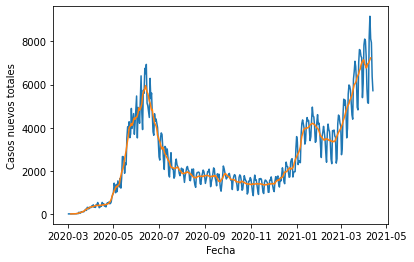

In [145]:
sns.lineplot(data=df, x=df.index, y='Casos nuevos totales')
sns.lineplot(data=df, x=df.index, y='Media movil semanal Casos nuevos totales')